In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/Sign-Language-Digits-Dataset-master.zip 

Archive:  /content/drive/My Drive/Colab Notebooks/Sign-Language-Digits-Dataset-master.zip
a8e74fdf07410782d1bb8c12caa259a5f7154864
replace Sign-Language-Digits-Dataset-master/Dataset/0/IMG_1118.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [56]:
!pip install  --upgrade tensorflow 

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.0.0)


In [0]:
from PIL import Image
import numpy as np
import random
import os 
import cv2
from google.colab.patches import cv2_imshow
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.python.keras.layers import Dense,Flatten
from tensorflow.python.keras import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
images = []
RGB_images=[]
labels =  []
list_ = [0 , 1 , 2 , 3 , 4 , 5 , 6 ,7 , 8 , 9 ]
for i in list_ :
  for img_path in os.listdir("Sign-Language-Digits-Dataset-master/Dataset/" + str(i) + "/"):
    img = Image.open("Sign-Language-Digits-Dataset-master/Dataset/" + str(i) + "/" + img_path )
    img  = img.resize((100 , 100))
    img = np.array(img)
    RGB_images.append(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    images.append(np.array(img))
    labels.append(i)

In [0]:
labelsR = labels
c = list(zip(images  , labels ) )
random.shuffle(c)
images , labels = zip(*c)



c = list(zip(RGB_images  , labelsR ) )
random.shuffle(c)
RGB_images , labelsR = zip(*c)



In [0]:
images = np.array(images)
labels = np.array(labels)
RGB_images = np.array(RGB_images)
labelsR = np.array(labelsR)

In [61]:
labels.reshape( ( -1 , 1 ) )
labelsR.reshape( ( -1 , 1 ) )
print(images.shape)
print(labels.shape)
print(RGB_images.shape)
print(labelsR.shape)


(2062, 100, 100)
(2062,)
(2062, 100, 100, 3)
(2062,)


In [0]:
images = images / 255.0
RGB_images = RGB_images / 255.0

In [0]:
ratio_train  = int(2062 * ( 60 / 100 ))
ratio_test = int(2062 * ( 20 / 100 ))
X_Train = images[ 0 : ratio_train  , : ]
Y_Train = labels[0 : ratio_train   ]
X_test = images[ratio_train : ratio_test + ratio_train , : ]
Y_test = labels[ratio_train : ratio_test + ratio_train  ]
X_validation = images[ratio_test + ratio_train: , :  ]
Y_validation = labels[ratio_test + ratio_train:]




X_TrainR = RGB_images[ 0 : ratio_train  , : ]
Y_TrainR = labelsR[0 : ratio_train   ]
X_testR = RGB_images[ratio_train : ratio_test + ratio_train , : ]
Y_testR = labelsR[ratio_train : ratio_test + ratio_train  ]
X_validationR = RGB_images[ratio_test + ratio_train: , :  ]
Y_validationR = labelsR[ratio_test + ratio_train:]





In [64]:
print(X_Train.shape)
print(Y_Train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_validation.shape)
print(Y_validation.shape)



print(X_TrainR.shape)
print(Y_TrainR.shape)
print(X_testR.shape)
print(Y_testR.shape)
print(X_validationR.shape)
print(Y_validationR.shape)



(1237, 100, 100)
(1237,)
(412, 100, 100)
(412,)
(413, 100, 100)
(413,)
(1237, 100, 100, 3)
(1237,)
(412, 100, 100, 3)
(412,)
(413, 100, 100, 3)
(413,)


Train on 1237 samples, validate on 413 samples
Epoch 1/50
1237/1237 [==============================] - 3s 3ms/sample - loss: 13.0922 - accuracy: 0.1083 - val_loss: 2.4782 - val_accuracy: 0.1598
Epoch 2/50
1237/1237 [==============================] - 3s 2ms/sample - loss: 2.2812 - accuracy: 0.1876 - val_loss: 2.1149 - val_accuracy: 0.3245
Epoch 3/50
1237/1237 [==============================] - 3s 2ms/sample - loss: 2.0324 - accuracy: 0.3007 - val_loss: 1.9291 - val_accuracy: 0.3269
Epoch 4/50
1237/1237 [==============================] - 3s 2ms/sample - loss: 1.8318 - accuracy: 0.3994 - val_loss: 2.1644 - val_accuracy: 0.3075
Epoch 5/50
1237/1237 [==============================] - 3s 2ms/sample - loss: 1.8463 - accuracy: 0.3767 - val_loss: 1.7141 - val_accuracy: 0.4649
Epoch 6/50
1237/1237 [==============================] - 3s 2ms/sample - loss: 1.5557 - accuracy: 0.4972 - val_loss: 1.7647 - val_accuracy: 0.4189
Epoch 7/50
1237/1237 [==============================] - 3s 2ms/sample - loss

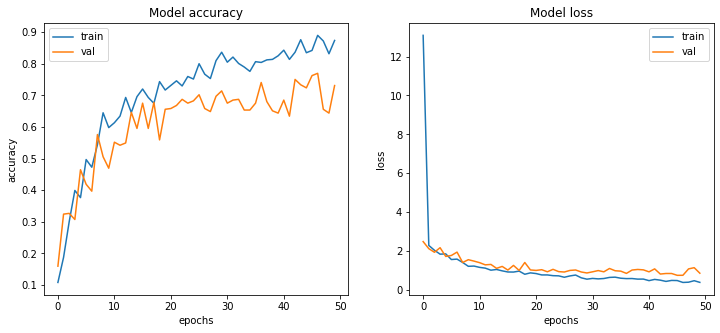

412/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.8463471751768612, 0.7718447]

In [66]:
model1 = Sequential()
checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True, save_weights_only=True)
callbacks=[checkpoint]
model1.add( Flatten(input_shape = ( 100 , 100 ) ) )
model1.add( Dense( 1024  , activation = "relu"   ) )
model1.add( Dense( 10  , activation = "softmax"   ) )
model1.compile( optimizer = "adam" , loss = "sparse_categorical_crossentropy" , metrics =  ["accuracy"] )
hist1 = model1.fit( X_Train , Y_Train , validation_data = ( X_validation , Y_validation ) , epochs = 50  , callbacks = callbacks )
fig , ax=plt.subplots(1,2,figsize=(12,5))
ax.ravel()
for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(hist1.history[met])
    ax[i].plot(hist1.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
plt.show()
model1.evaluate( x = X_test , y = Y_test  , verbose  = 1 )

Train on 1237 samples, validate on 413 samples
Epoch 1/50
1237/1237 [==============================] - 2s 2ms/sample - loss: 4.4532 - accuracy: 0.1124 - val_loss: 2.6650 - val_accuracy: 0.0944
Epoch 2/50
1237/1237 [==============================] - 2s 1ms/sample - loss: 2.3507 - accuracy: 0.1665 - val_loss: 2.1640 - val_accuracy: 0.2421
Epoch 3/50
1237/1237 [==============================] - 2s 1ms/sample - loss: 2.1201 - accuracy: 0.2522 - val_loss: 2.0570 - val_accuracy: 0.2712
Epoch 4/50
1237/1237 [==============================] - 2s 1ms/sample - loss: 1.9048 - accuracy: 0.3331 - val_loss: 1.7387 - val_accuracy: 0.4068
Epoch 5/50
1237/1237 [==============================] - 2s 1ms/sample - loss: 1.6836 - accuracy: 0.4002 - val_loss: 1.8808 - val_accuracy: 0.3220
Epoch 6/50
1237/1237 [==============================] - 2s 1ms/sample - loss: 1.5234 - accuracy: 0.4762 - val_loss: 1.5581 - val_accuracy: 0.4334
Epoch 7/50
1237/1237 [==============================] - 2s 1ms/sample - loss:

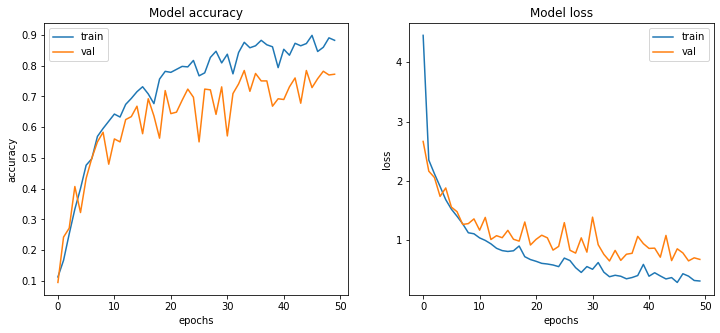

412/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.7252058861325088, 0.7791262]

In [75]:
model2 = Sequential()

checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True, save_weights_only=True)
callbacks=[checkpoint]
model2.add( Flatten(input_shape = ( 100 , 100 ) ) )
model2.add( Dense( 512  , activation = "relu"   ) )
model2.add( Dense( 512  , activation = "relu"   ) )
model2.add( Dense( 10  , activation = "softmax"   ) )
model2.compile( optimizer = "adam" , loss = "sparse_categorical_crossentropy" , metrics =  ["accuracy"] )
hist2 = model2.fit( X_Train , Y_Train , validation_data = ( X_validation , Y_validation ) , epochs = 50  ,callbacks = callbacks )
fig , ax=plt.subplots(1,2,figsize=(12,5))
ax.ravel()
for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(hist2.history[met])
    ax[i].plot(hist2.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
plt.show()
model2.evaluate( x = X_test , y = Y_test  , verbose  = 1 )

Train on 1237 samples, validate on 413 samples
Epoch 1/50
1237/1237 [==============================] - 2s 2ms/sample - loss: 2.9504 - accuracy: 0.0865 - val_loss: 2.5960 - val_accuracy: 0.0993
Epoch 2/50
1237/1237 [==============================] - 1s 1ms/sample - loss: 2.3644 - accuracy: 0.1229 - val_loss: 2.2577 - val_accuracy: 0.1622
Epoch 3/50
1237/1237 [==============================] - 2s 1ms/sample - loss: 2.2444 - accuracy: 0.1787 - val_loss: 2.1849 - val_accuracy: 0.2785
Epoch 4/50
1237/1237 [==============================] - 1s 1ms/sample - loss: 2.2052 - accuracy: 0.1940 - val_loss: 2.1909 - val_accuracy: 0.2155
Epoch 5/50
1237/1237 [==============================] - 1s 1ms/sample - loss: 2.0887 - accuracy: 0.2652 - val_loss: 2.1741 - val_accuracy: 0.2470
Epoch 6/50
1237/1237 [==============================] - 1s 1ms/sample - loss: 2.1598 - accuracy: 0.2110 - val_loss: 2.3083 - val_accuracy: 0.0726
Epoch 7/50
1237/1237 [==============================] - 1s 1ms/sample - loss:

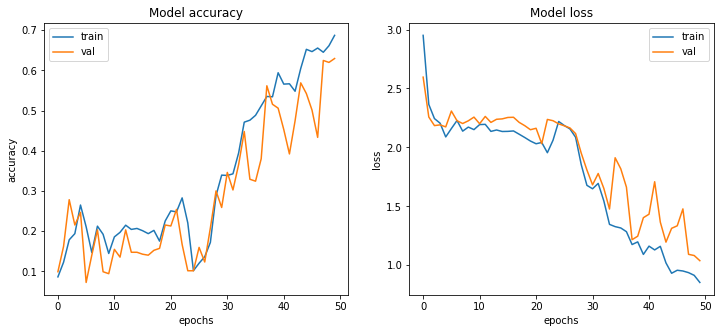

412/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.083761291596496, 0.66019416]

In [73]:
model3 = Sequential()

checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True, save_weights_only=True)
callbacks=[checkpoint]
model3.add( Flatten(input_shape = ( 100 , 100 ) ) )
model3.add( Dense( 512  , activation = "relu"   ) )
model3.add( Dense( 256  , activation = "relu"   ) )
model3.add( Dense( 64  , activation = "relu"   ) )
model3.add( Dense( 10  , activation = "softmax"   ) )
model3.compile( optimizer = "adam" , loss = "sparse_categorical_crossentropy" , metrics =  ["accuracy"] )
hist3 = model3.fit( X_Train , Y_Train , validation_data = ( X_validation , Y_validation ) , epochs = 50  , callbacks = callbacks )
fig , ax=plt.subplots(1,2,figsize=(12,5))
ax.ravel()
for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(hist3.history[met])
    ax[i].plot(hist3.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
plt.show()
model3.evaluate( x = X_test , y = Y_test  , verbose  = 1 )

Train on 1237 samples, validate on 413 samples
Epoch 1/50
1237/1237 [==============================] - 2s 2ms/sample - loss: 3.1033 - accuracy: 0.0954 - val_loss: 2.4459 - val_accuracy: 0.1017
Epoch 2/50
1237/1237 [==============================] - 1s 1ms/sample - loss: 2.4322 - accuracy: 0.1350 - val_loss: 2.3838 - val_accuracy: 0.1259
Epoch 3/50
1237/1237 [==============================] - 2s 1ms/sample - loss: 2.3136 - accuracy: 0.1552 - val_loss: 2.2358 - val_accuracy: 0.1308
Epoch 4/50
1237/1237 [==============================] - 1s 1ms/sample - loss: 2.1984 - accuracy: 0.2167 - val_loss: 2.2732 - val_accuracy: 0.2688
Epoch 5/50
1237/1237 [==============================] - 1s 1ms/sample - loss: 2.0561 - accuracy: 0.2870 - val_loss: 2.0784 - val_accuracy: 0.2421
Epoch 6/50
1237/1237 [==============================] - 1s 1ms/sample - loss: 1.9465 - accuracy: 0.3137 - val_loss: 2.1109 - val_accuracy: 0.1961
Epoch 7/50
1237/1237 [==============================] - 1s 1ms/sample - loss:

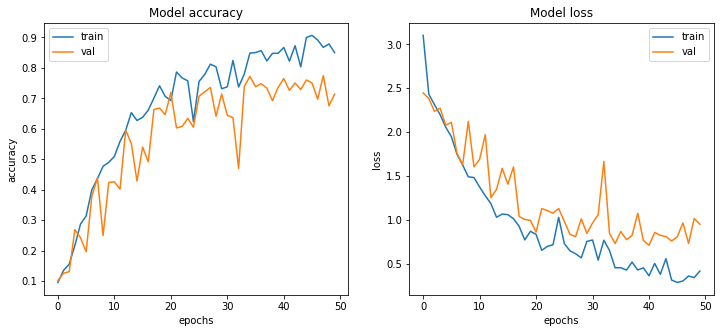

412/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.9765433935285772, 0.7281553]

In [72]:
model4 = Sequential()
checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True, save_weights_only=True)
callbacks=[checkpoint]
model4.add( Flatten(input_shape = ( 100 , 100 ) ) )
model4.add( Dense( 512  , activation = "relu"   ) )
model4.add( Dense( 256  , activation = "relu"   ) )
model4.add( Dense( 128  , activation = "relu"   ) )
model4.add( Dense( 64  , activation = "relu"   ) )
model4.add( Dense( 10  , activation = "softmax"   ) )
model4.compile( optimizer = "adam" , loss = "sparse_categorical_crossentropy" , metrics =  ["accuracy"] , callbacks = callbacks )
hist4 = model4.fit( X_Train , Y_Train , validation_data = ( X_validation , Y_validation ) , epochs = 50  )
fig , ax=plt.subplots(1,2,figsize=(12,5))
ax.ravel()
for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(hist4.history[met])
    ax[i].plot(hist4.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
plt.show()
model4.evaluate( x = X_test , y = Y_test  , verbose  = 1 )

In [0]:
#CNN MODEL

Train on 1237 samples, validate on 413 samples
Epoch 1/100
1237/1237 [==============================] - 5s 4ms/sample - loss: 2.3206 - accuracy: 0.1002 - val_loss: 2.2864 - val_accuracy: 0.1719
Epoch 2/100
1237/1237 [==============================] - 5s 4ms/sample - loss: 2.2691 - accuracy: 0.1447 - val_loss: 2.2193 - val_accuracy: 0.1017
Epoch 3/100
1237/1237 [==============================] - 5s 4ms/sample - loss: 2.0236 - accuracy: 0.2765 - val_loss: 1.5806 - val_accuracy: 0.4818
Epoch 4/100
1237/1237 [==============================] - 5s 4ms/sample - loss: 1.4425 - accuracy: 0.4899 - val_loss: 0.8873 - val_accuracy: 0.7700
Epoch 5/100
1237/1237 [==============================] - 5s 4ms/sample - loss: 1.0229 - accuracy: 0.6265 - val_loss: 0.6262 - val_accuracy: 0.8305
Epoch 6/100
1237/1237 [==============================] - 5s 4ms/sample - loss: 0.7704 - accuracy: 0.7421 - val_loss: 0.4450 - val_accuracy: 0.8910
Epoch 7/100
1237/1237 [==============================] - 5s 4ms/sample 

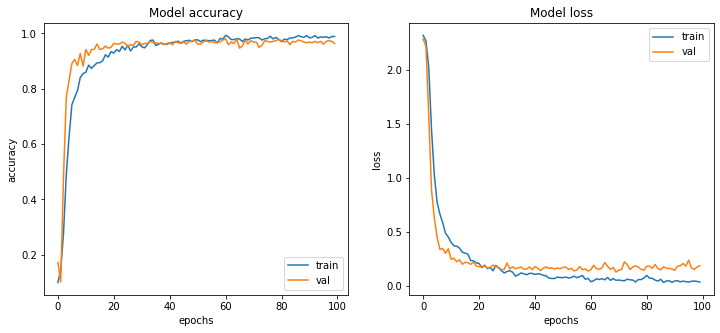

412/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.1455617682483879, 0.9611651]

In [71]:
model_1_CNN = tf.keras.models.Sequential()
checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True, save_weights_only=True)
callbacks=[checkpoint]
model_1_CNN.add( tf.keras.layers.Conv2D ( 64 , kernel_size = ( 4 , 4 ) , strides = (2,2) , padding='same',activation = 'tanh' )   )
model_1_CNN.add( tf.keras.layers.MaxPool2D( pool_size = ( 4 , 4 ) )  )
model_1_CNN.add( tf.keras.layers.Conv2D ( 16 , kernel_size = ( 4  , 4 ) , strides = (1,1), padding = 'same',activation = 'tanh' )   )
model_1_CNN.add( tf.keras.layers.MaxPool2D( pool_size = ( 4 , 4 ) )  )
model_1_CNN.add( tf.keras.layers.Flatten( ) )
model_1_CNN.add(tf.keras.layers.Dropout( 0.2 ) )
model_1_CNN.add( tf.keras.layers.Dense( 64  , activation = "relu"   ) )
model_1_CNN.add(tf.keras.layers.Dropout( 0.2 ) )
model_1_CNN.add( tf.keras.layers.Dense( 128  , activation = "relu"   ) )
model_1_CNN.add(tf.keras.layers.Dropout( 0.2 ) )
model_1_CNN.add( tf.keras.layers.Dense( 10  , activation = "softmax"   ) )
model_1_CNN.compile( optimizer = "adam" , loss = "sparse_categorical_crossentropy" , metrics =  ["accuracy"] , callbacks = callbacks )
hist5 = model_1_CNN.fit( X_TrainR , Y_TrainR , validation_data = ( X_validationR , Y_validationR ) , epochs = 100   )
fig , ax=plt.subplots(1,2,figsize=(12,5))
ax.ravel()
for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(hist5.history[met])
    ax[i].plot(hist5.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
plt.show()
model_1_CNN.evaluate( x = X_testR , y = Y_testR  , verbose  = 1 )